In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
df_german=pd.read_csv('german_credit.csv')
df_german.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


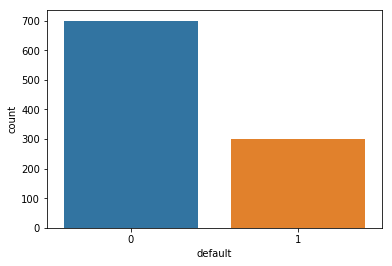

In [3]:
sns.countplot(df_german.default)

In [4]:
df_german.shape

(1000, 21)

In [5]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [6]:
from sklearn.model_selection import train_test_split
Y=df_german.pop('default')
X=df_german.iloc[:,0:-1]

In [7]:
# Lets build a Ensemble model but need to modify the dataset first
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.5,random_state=1)
df_new= pd.concat([x_train,y_train],axis=1,sort=True)
df_new.head(10)

,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,default
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,1
4,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,1
5,no checking account,36,existing credits paid back duly till now,(vacation - does not exist?),9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,none,4,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",0
7,0 <= ... < 200 DM,36,existing credits paid back duly till now,car (used),6948,... < 100 DM,1 <= ... < 4 years,2,male : single,none,2,"if not A121/A122 : car or other, not in attrib...",35,none,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",0
10,0 <= ... < 200 DM,12,existing credits paid back duly till now,car (new),1295,... < 100 DM,... < 1 year,3,female : divorced/separated/married,none,1,"if not A121/A122 : car or other, not in attrib...",25,none,rent,1,skilled employee / official,1,none,1
15,< 0 DM,24,existing credits paid back duly till now,domestic appliances,1282,100 <= ... < 500 DM,1 <= ... < 4 years,4,female : divorced/separated/married,none,2,"if not A121/A122 : car or other, not in attrib...",32,none,own,1,unskilled - resident,1,none,1
18,0 <= ... < 200 DM,24,existing credits paid back duly till now,car (used),12579,... < 100 DM,.. >= 7 years,4,female : divorced/separated/married,none,2,unknown / no property,44,none,for free,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",1
20,no checking account,9,critical account/ other credits existing (not ...,car (new),2134,... < 100 DM,1 <= ... < 4 years,4,male : single,none,4,"if not A121/A122 : car or other, not in attrib...",48,none,own,3,skilled employee / official,1,"yes, registered under the customers name",0
21,< 0 DM,6,existing credits paid back duly till now,domestic appliances,2647,500 <= ... < 1000 DM,1 <= ... < 4 years,2,male : single,none,3,real estate,44,none,rent,1,skilled employee / official,2,none,0
22,< 0 DM,10,critical account/ other credits existing (not ...,car (new),2241,... < 100 DM,... < 1 year,1,male : single,none,3,real estate,48,none,rent,2,unskilled - resident,2,none,0


In [8]:
df_new.shape

(500, 20)

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [9]:
# Print Shape of model data
#col_to_transform=
df_with_dummies = pd.get_dummies( df_new)
df_with_dummies.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,default,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name"
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,0,1,...,0,1,0,0,0,1,0,0,1,0
5,36,9055,2,4,35,1,2,0,0,0,...,0,1,0,0,0,0,0,1,0,1
7,36,6948,2,2,35,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1
10,12,1295,3,1,25,1,1,1,1,0,...,0,0,0,1,0,1,0,0,1,0


### Check for highly correlated variables but don't required any treatment for this use case

In [10]:
df_with_dummies.corr()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,default,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name"
duration_in_month,1.000000,0.621934,0.121678,-0.009039,-0.054504,-0.078458,-0.057544,0.154395,0.139030,-0.038817,...,0.071134,0.194154,-0.038749,-0.118875,0.196724,0.011255,-0.034287,-0.186423,-0.185221,0.185221
credit_amount,0.621934,1.000000,-0.215371,0.038010,0.058086,-0.021106,0.019018,0.102781,0.138910,-0.082235,...,0.069622,0.238881,-0.109663,-0.072627,0.375525,-0.125468,-0.076678,-0.172477,-0.318831,0.318831
installment_as_income_perc,0.121678,-0.215371,1.000000,0.028310,0.042569,0.017900,-0.088701,0.130897,-0.032336,0.054283,...,-0.002092,0.017641,0.029932,-0.050538,0.037229,0.021447,-0.066777,-0.040887,0.009868,-0.009868
present_res_since,-0.009039,0.038010,0.028310,1.000000,0.273547,0.064556,0.057483,-0.004657,-0.057776,0.030969,...,-0.084003,0.228775,-0.256385,0.110245,-0.025189,-0.005186,0.047173,0.015645,-0.065494,0.065494
age,-0.054504,0.058086,0.042569,0.273547,1.000000,0.142372,0.097632,-0.135853,-0.077660,-0.008085,...,-0.005505,0.256559,-0.027520,-0.185217,0.131774,-0.194528,0.115356,0.081238,-0.144705,0.144705
credits_this_bank,-0.078458,-0.021106,0.017900,0.064556,0.142372,1.000000,0.114729,-0.047948,-0.074201,-0.074377,...,-0.024226,-0.054391,0.050856,-0.014214,-0.053292,0.002889,0.094538,0.017696,0.004274,-0.004274
people_under_maintenance,-0.057544,0.019018,-0.088701,0.057483,0.097632,0.114729,1.000000,0.005908,-0.093340,0.101191,...,0.060766,0.145140,-0.091633,-0.014426,0.001558,-0.084729,-0.047677,0.116626,-0.026513,0.026513
default,0.154395,0.102781,0.130897,-0.004657,-0.135853,-0.047948,0.005908,1.000000,0.119061,0.266244,...,0.074202,0.004475,-0.083858,0.095812,-0.007669,-0.004743,-0.006760,0.014965,0.066688,-0.066688
account_check_status_0 <= ... < 200 DM,0.139030,0.138910,-0.032336,-0.057776,-0.077660,-0.074201,-0.093340,0.119061,1.000000,-0.369723,...,-0.034058,-0.006935,-0.018287,0.027613,0.091056,-0.062256,-0.032286,0.001275,-0.029607,0.029607
account_check_status_< 0 DM,-0.038817,-0.082235,0.054283,0.030969,-0.008085,-0.074377,0.101191,0.266244,-0.369723,1.000000,...,0.025861,0.073800,-0.109210,0.067046,-0.036253,0.021532,0.002052,0.006714,0.100149,-0.100149


### Drop the original variables which are converted to dummy

The variables are already been drop in get_dummies function since I created new variable.

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [11]:
last=df_with_dummies.pop('default')
df_with_dummies=pd.concat([df_with_dummies,last],axis=1)
#Just putting target column in last place

In [12]:
X_new=df_with_dummies.iloc[:,0:-1]
Y_new=df_with_dummies['default']
x_train, x_test, y_train, y_test = train_test_split(X_new,Y_new,test_size=0.3,random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfcl = rfcl.fit(x_train, y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [39]:
from sklearn import metrics

print('Training accuracy',rfcl.score(x_train , y_train))
print('Testing accuracy',rfcl.score(x_test , y_test))


Training accuracy 1.0
Testing accuracy 0.72


In [40]:
y_predict = rfcl.predict(x_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[90 10]
 [32 18]]


### Q6 Show the list of the features importance( 1 Marks)

In [16]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = x_train.columns))

                                                         Imp
duration_in_month                                   0.066193
credit_amount                                       0.102252
installment_as_income_perc                          0.042909
present_res_since                                   0.036820
age                                                 0.087969
credits_this_bank                                   0.015732
people_under_maintenance                            0.010540
account_check_status_0 <= ... < 200 DM              0.019364
account_check_status_< 0 DM                         0.035528
account_check_status_>= 200 DM / salary assignm...  0.009243
account_check_status_no checking account            0.046448
credit_history_all credits at this bank paid ba...  0.009831
credit_history_critical account/ other credits ...  0.032102
credit_history_delay in paying off in the past      0.009527
credit_history_existing credits paid back duly ...  0.015047
credit_history_no credit

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [18]:
# Use below values
num_folds = 10
seed = 77
cv = KFold(10,random_state=77)

In [19]:
#Validate the Random Forest model build above using k fold

In [21]:
cross_val_score(rfcl, x_train, y_train, cv=cv)

array([0.77142857, 0.85714286, 0.71428571, 0.6       , 0.74285714,
       0.65714286, 0.85714286, 0.8       , 0.74285714, 0.74285714])

In [8]:
#Calculate Mean score

In [24]:
print (np.mean(cross_val_score(rfcl, x_train, y_train, cv=cv)))

0.7485714285714286


In [25]:
# Calculate score standard deviation using std()

In [38]:
print (np.std(cross_val_score(rfcl, x_train, y_train,cv=cv)))

0.07645193234434086


# Q8 Print the confusion matrix( 1 Marks)

In [48]:
from sklearn.model_selection import cross_val_predict
y_predict = cross_val_predict(rfcl,x_test,y_test,cv=cv)
print(metrics.confusion_matrix(y_test, y_predict))

[[90 10]
 [37 13]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [30]:

confusion = metrics.confusion_matrix(y_test, y_predict)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[90 10]
 [32 18]]


In [31]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_predict))

0.36
0.36


In [32]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_predict))

0.6428571428571429
0.6428571428571429


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [10]:
#Hint: Use roc_curve

In [34]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = rfcl.predict_proba(x_test)[:,1]

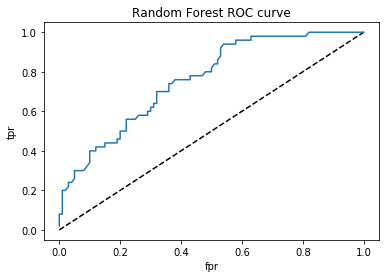

In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest ROC curve')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [36]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)


In [37]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.63

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [13]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []